In [19]:
""" 

NYC Elev: 154.0 ft; Lat/Lon: 40.78333°N / -73.96667°W
Chi Lat: 41.78°N Lon: -87.76°W Elev: 617ft.
Miami Lat: 25.79°N Lon: -80.32°W Elev: 10ft.
Austin Lat: 30.18°N Lon: -97.68°W Elev: 486ft. 

"""

# day 1 - just making API call and taking that choice
import http.client
import json
from datetime import datetime


def get_weather(city_name, latitude, longitude):
    conn = http.client.HTTPSConnection("api.openweathermap.org")
    payload = ''
    headers = {}

    print('----------')
    print(f'{city_name} on {datetime.now()}')
    conn.request("GET", f"/data/2.5/weather?lat={latitude}&lon={longitude}&appid=3f4c2b994a539c4372210a46131f36e2&units=imperial", payload, headers)
    res = conn.getresponse()
    data = res.read().decode('utf-8')

    # Parsing JSON data
    json_data = json.loads(data)

    # Extracting temp_max from the parsed JSON data
    temp_max = json_data["main"]

    print(f'{city_name} Max Temperature:', temp_max)
    print('----------')

# NYC
get_weather('NYC', 40.783, -73.96)

# Chicago
get_weather('Chicago', 41.78, -87.76)

# Miami
get_weather('Miami', 25.79, -80.32)

# Austin
get_weather('Austin', 30.18, -97.68)





----------
NYC on 2024-03-06 15:05:47.177401
NYC Max Temperature: {'temp': 49.03, 'feels_like': 44.83, 'temp_min': 45.68, 'temp_max': 52.18, 'pressure': 1016, 'humidity': 90}
----------
----------
Chicago on 2024-03-06 15:05:47.348204
Chicago Max Temperature: {'temp': 48.09, 'feels_like': 42.21, 'temp_min': 42.91, 'temp_max': 55.08, 'pressure': 1012, 'humidity': 56}
----------
----------
Miami on 2024-03-06 15:05:47.439673
Miami Max Temperature: {'temp': 79.84, 'feels_like': 79.84, 'temp_min': 78.03, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 78}
----------
----------
Austin on 2024-03-06 15:05:47.501058
Austin Max Temperature: {'temp': 82.17, 'feels_like': 83.93, 'temp_min': 79.25, 'temp_max': 85.19, 'pressure': 1010, 'humidity': 56}
----------


In [ ]:
# trying tomorrow io api


import http.client

conn = http.client.HTTPSConnection("api.tomorrow.io")
payload = ''
headers = {}
conn.request("GET", "/v4/weather/forecast?apikey=zITDa7BozjihbZ481cr0ecmAr7addQ1h&location=42.3478,%20-71.0466&timestep=1h", payload, headers)
res = conn.getresponse()
data = res.read().decode('utf-8')
#print(data)

# Parsing JSON data
json_data = json.loads(data)

    # Save the JSON data to a file
filename = 'test_weather_data.json'
with open(filename, 'w') as json_file:
    json.dump(json_data, json_file, indent=4)
    print(f'Data saved to {filename}')
#print(json_data['timelines']['daily']['temperatureMax'])

# finding the best way to get out the json I need
# Specify the file name or path
filename_nyc = 'test_weather_data.json'

# Load JSON data from the file
with open(filename_nyc, 'r') as json_file:
    nyc_weather_data = json.load(json_file)


print(nyc_weather_data['timelines']['daily'][0]['values']['temperatureMax'])

# Now you can use nyc_weather_data in the current cell
#print("NYC Weather Data:")
#print(json.dumps(nyc_weather_data)



In [2]:
import http.client
import json
from datetime import datetime

def get_weather_tomorrow_io(city_name, latitude, longitude):
    conn = http.client.HTTPSConnection("api.tomorrow.io")
    payload = ''
    headers = {}

    print('----------')
    print(f'{city_name} on {datetime.now()}')
    conn.request("GET", f"/v4/weather/forecast?apikey=zITDa7BozjihbZ481cr0ecmAr7addQ1h&location={latitude},{longitude}&timestep=1h", payload, headers)
    res = conn.getresponse()
    data = res.read().decode('utf-8')

    # Parsing JSON data
    json_data = json.loads(data)
    temperature_max = json_data['timelines']['daily'][0]['values']['temperatureMax']

    print(f'{city_name} Max Temperature:', temperature_max)
    print('----------')

# NYC
get_weather_tomorrow_io('NYC', 40.783, -73.96)

# Chicago
get_weather_tomorrow_io('Chicago', 41.78, -87.76)

# Miami
get_weather_tomorrow_io('Miami', 25.79, -80.32)

# Austin
get_weather_tomorrow_io('Austin', 30.18, -97.68)


----------
NYC on 2024-03-05 15:37:08.283765
NYC Max Temperature: 7.83
----------
----------
Chicago on 2024-03-05 15:37:09.040025
Chicago Max Temperature: 5.88
----------
----------
Miami on 2024-03-05 15:37:09.765081
Miami Max Temperature: 28
----------
----------
Austin on 2024-03-05 15:37:10.467977
Austin Max Temperature: 31.69
----------


9


In [ ]:
# notes from 3.4 in class
# need to go to website and web scrape public tables (if no API exists)
# prob nede to consider relationship between wind, humidty, etc. 
# more features prob means more accurate 
# combine with prediction 

In [4]:
import os
import camelot
import pandas as pd

# Replace 'pdf_folder' with the path to your folder containing PDFs
pdf_folder = '/Users/samdvorin/Desktop/code/542/weather-prediction/weather data'

# Iterate through all PDF files in the folder
for pdf_path in os.listdir(pdf_folder):
    if pdf_path.endswith(".pdf"):
        # Use camelot to extract tables from PDF
        tables = camelot.read_pdf(os.path.join(pdf_folder, pdf_path), flavor='stream', pages='all')

        # Concatenate tables into a single DataFrame
        df = pd.concat([table.df for table in tables], ignore_index=True)

        # Create a CSV file name based on the PDF file name
        csv_output = os.path.splitext(pdf_path)[0] + '.csv'

        # Save DataFrame to CSV
        df.to_csv(csv_output, index=False)

        print(f"Conversion completed for {pdf_path}. CSV file saved as {csv_output}")


Conversion completed for chi_april_2023.pdf. CSV file saved as chi_april_2023.csv
Conversion completed for austin_april_2023.pdf. CSV file saved as austin_april_2023.csv
Conversion completed for austin_march_2023.pdf. CSV file saved as austin_march_2023.csv
Conversion completed for chi_march_2023.pdf. CSV file saved as chi_march_2023.csv
Conversion completed for miami_feb_2024.pdf. CSV file saved as miami_feb_2024.csv
Conversion completed for austin_max.pdf. CSV file saved as austin_max.csv
Conversion completed for austin_feb_2024.pdf. CSV file saved as austin_feb_2024.csv
Conversion completed for miami_max.pdf. CSV file saved as miami_max.csv
Conversion completed for centralpark_march_2023.pdf. CSV file saved as centralpark_march_2023.csv
Conversion completed for chi_feb_2024.pdf. CSV file saved as chi_feb_2024.csv
Conversion completed for centralpark_april_2023.pdf. CSV file saved as centralpark_april_2023.csv
Conversion completed for centralpark_max.pdf. CSV file saved as centralpar

In [6]:
import pandas as pd

file_path = "/Users/samdvorin/Desktop/code/542/weather-prediction/csvs/austin_april_2023.csv"
df = pd.read_csv(file_path)
df = df.drop([0, 1])

# Resetting the index after dropping rows
df = df.reset_index(drop=True)
df['Lat'] = 30.18
df['Lon'] = -97.68
df['Elevation'] = 486
df['City'] = 'Austin'
df.head()

,0,1,2,3,4,5,6,7,8,9,Lat,Lon,Elevation,City
0,Date,NaN,NaN,NaN,NaN,HDD,CDD,Precipitation,New Snow,Snow Depth,30.18,-97.68,486,Austin
1,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,30.18,-97.68,486,Austin
2,2023-04-01,81,44,62.5,-2.4,2,0,0.00,0.0,0,30.18,-97.68,486,Austin
3,2023-04-02,84,54,69.0,3.8,0,4,0.00,0.0,0,30.18,-97.68,486,Austin
4,2023-04-03,90,69,79.5,14.1,0,15,0.00,0.0,0,30.18,-97.68,486,Austin


In [25]:
import pandas as pd
import os

# Define the directory path containing your CSV files
directory_path = "/Users/samdvorin/Desktop/code/542/weather-prediction/csvs"

# List of city information
cities_info = {
    'centralpark': {'Lat': 40.78333, 'Lon': -73.96667, 'Elevation': 154, 'City': 'Central Park'},
    'chi': {'Lat': 41.78, 'Lon': -87.76, 'Elevation': 617, 'City': 'Chicago'},
    'miami': {'Lat': 25.79, 'Lon': -80.32, 'Elevation': 10, 'City': 'Miami'},
    'austin': {'Lat': 30.18, 'Lon': -97.68, 'Elevation': 486, 'City': 'Austin'}
}

# List to store individual DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        df = df.iloc[:-12]



        # Extract the city from the filename
        city = filename.split('_')[0]

        # Add columns for latitude, longitude, elevation, and city
        df['Lat'] = cities_info[city]['Lat']
        df['Lon'] = cities_info[city]['Lon']
        df['Elevation'] = cities_info[city]['Elevation']
        df['City'] = cities_info[city]['City']
        

        # Append the DataFrame to the list
        dfs.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df.dropna()

# Reset the index
combined_df = combined_df.reset_index(drop=True)
new_column_names = ['Date', 'Maximum', 'Minimum', 'Average', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth', 'Lat', 'Lon', 'Elevation', 'City']

# Replace the first row with the new column names
combined_df.columns = new_column_names



#['Date', 'Maximum', 'Minimum', 'Average', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth', 'Lat', 'Lon', 'Elevation', 'City']
output_file_path = "output_file.csv"
combined_df.to_csv(output_file_path, index=False)


In [5]:
import pandas as pd

file_path = "/Users/samdvorin/Desktop/code/542/weather-prediction/FINAL_DATA.csv"
df = pd.read_csv(file_path)
df.head()

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Lat,Lon,Elevation,City
0,2024-02-01,46,37,41.5,7.8,23,0,0.00,0.0,0,40.78333,-73.96667,154,Central Park
1,2024-02-02,46,38,42.0,8.2,23,0,0.32,0.0,0,40.78333,-73.96667,154,Central Park
2,2024-02-03,43,32,37.5,3.6,27,0,0.00,0.0,0,40.78333,-73.96667,154,Central Park
3,2024-02-04,46,31,38.5,4.5,26,0,0.00,0.0,0,40.78333,-73.96667,154,Central Park
4,2024-02-05,45,32,38.5,4.3,26,0,0.00,0.0,0,40.78333,-73.96667,154,Central Park


Index(['Minimum', 'Average', 'Departure', 'HDD', 'CDD', 'Lat', 'Lon',
       'Elevation'],
      dtype='object')
Mean Squared Error: 1.6021940287462133e-26


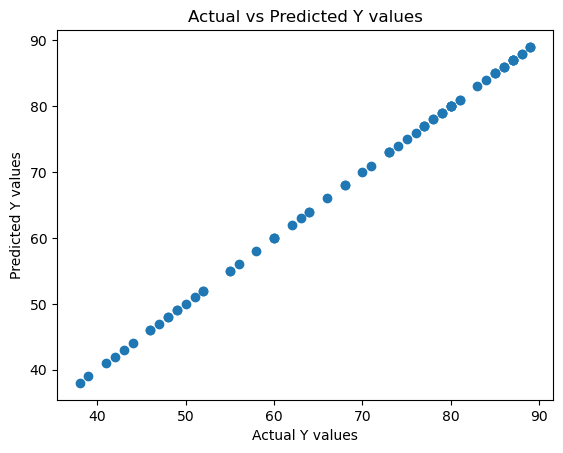

Model saved as model_Maximum.pkl


In [18]:
# first model


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

def train_and_save_model(csv_file, target_column):
    # Load the Data
    df = pd.read_csv(csv_file)

   # print(df.head())

    # Filter columns to keep only integer columns
    df = df.select_dtypes(include='number')

    X = df.drop(target_column, axis=1)
    Y = df[target_column]

    # Split the Data into Training and Testing Sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    print(X_train.columns)


    # Choose a Model
    model = LinearRegression()

    # Train the Model
    model.fit(X_train, Y_train)

    # Make Predictions
    Y_pred = model.predict(X_test)

    # Evaluate the Model
    mse = mean_squared_error(Y_test, Y_pred)
    print(f'Mean Squared Error: {mse}')

    # Visualize the Results
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Actual Y values")
    plt.ylabel("Predicted Y values")
    plt.title("Actual vs Predicted Y values")
    plt.show()

    # Save the Model
    model_filename = f'model_{target_column}.pkl'
    joblib.dump(model, model_filename)
    print(f'Model saved as {model_filename}')

# Example usage

file_path = "/Users/samdvorin/Desktop/code/542/weather-prediction/FINAL_DATA.csv"

train_and_save_model(file_path, 'Maximum')
